<a href="https://colab.research.google.com/github/qas95/Machine-Learning/blob/main/LeNet(CNN)_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import sklearn
from keras import datasets
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Dropout

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


This is a 5


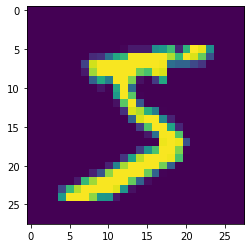

In [3]:
plt.imshow(X_train[0])
print('This is a',y_train[0])
plt.show()

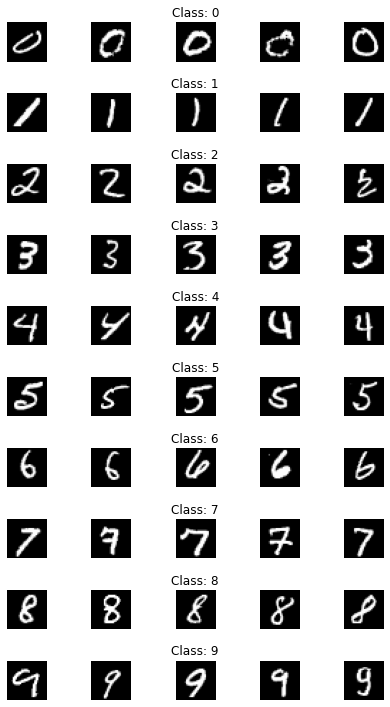

In [4]:
images_per_class = []

cols = 5
classes = 10
fig, axes = plt.subplots(nrows = classes, ncols = cols, figsize = (6,10))
fig.tight_layout()

for i in range(cols):
  for j in range(classes):
    x_selected = X_train[y_train == j]
    axes[j][i].imshow(x_selected[np.random.randint(0,x_selected.shape[0]-1)], cmap = plt.get_cmap('gray'))
    axes[j][i].axis('off')
    
    if i == 2:
      axes[j][i].set_title('Class: '+ str(j))
      images_per_class.append(x_selected.shape[0])

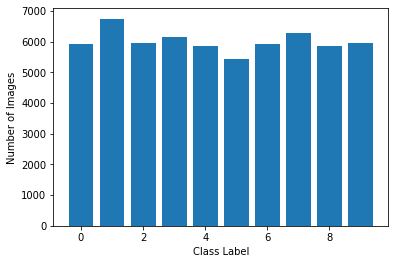

In [5]:
# Checking the number of images per class

plt.bar(list(range(0,classes)), images_per_class)
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.show()

In [6]:
#One Hot Encoding the class labels

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# Normalizing all images on a scale of 0 to 1

X_train = X_train/255
X_test = X_test/255

In [8]:
#Reshaping the input for feeding into the network as a flat 2D array

n_pixels = 784
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

In [9]:
X_train.shape
y_train.shape

(60000, 10)

In [33]:
adam = Adam(lr = 0.001)
def LeNet():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape = (28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(15, (3,3), activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(classes, activation = 'softmax'))
  model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model



In [34]:
LeNet().summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)              

In [35]:
model = LeNet()
h = model.fit(X_train, y_train, epochs = 10,batch_size = 10,  verbose = 1, validation_split = 0.1, shuffle=True)

Epoch 1/10
5400/5400 [==============================] - 52s 10ms/step - loss: 0.2825 - accuracy: 0.9125 - val_loss: 0.0467 - val_accuracy: 0.9852
Epoch 2/10
5400/5400 [==============================] - 51s 9ms/step - loss: 0.0656 - accuracy: 0.9795 - val_loss: 0.0393 - val_accuracy: 0.9878
Epoch 3/10
5400/5400 [==============================] - 52s 10ms/step - loss: 0.0444 - accuracy: 0.9865 - val_loss: 0.0415 - val_accuracy: 0.9883
Epoch 4/10
5400/5400 [==============================] - 50s 9ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0399 - val_accuracy: 0.9897
Epoch 5/10
5400/5400 [==============================] - 50s 9ms/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0357 - val_accuracy: 0.9922
Epoch 6/10
5400/5400 [==============================] - 51s 9ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0373 - val_accuracy: 0.9903
Epoch 7/10
5400/5400 [==============================] - 50s 9ms/step - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.0471 - val_

Text(0.5, 0, 'Epochs')

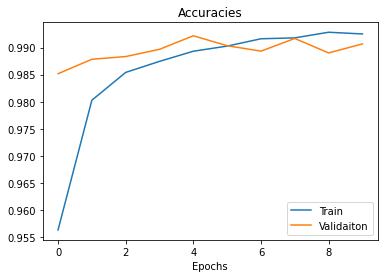

In [36]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Train','Validaiton'])
plt.title('Accuracies')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

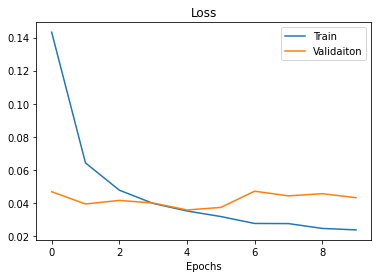

In [37]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['Train', 'Validaiton'])
plt.title('Loss')
plt.xlabel('Epochs')

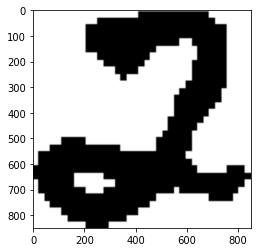

In [38]:
import requests
from PIL import Image
URL = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(URL, stream = True)
image = Image.open(response.raw)
plt.imshow(image)

In [39]:
import cv2

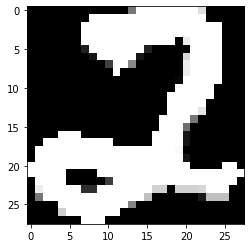

In [40]:
img_array = np.asarray(image)
img = cv2.resize(img_array, (28,28,))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))

In [41]:
img = img/255

In [51]:
img = img.reshape(1,28,28,1)
print('This is the number ',np.argmax(model.predict(img)))

This is the number  2


In [43]:
#Model Evaluation
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0270 - accuracy: 0.9920


In [44]:
print('Model generalization error is ', score[0])
print('Model generalization accuracy is ', score[1])

Model generalization error is  0.02701745554804802
Model generalization accuracy is  0.9919999837875366


In [45]:
#Visualizing the Convolutional Layers 
from keras.models import Model

In [49]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

In [53]:
visual1 = layer1.predict(img)
visual2 = layer2.predict(img)

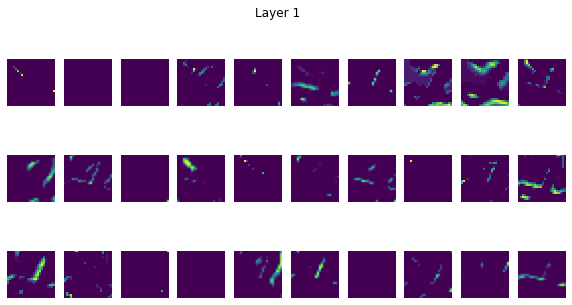

In [85]:
plt.figure(figsize=(10,5))
for i in range(visual1.shape[3]):
  plt.subplot(3,10, i+1)
  plt.imshow(visual1[0,:,:,i])
  plt.suptitle('Layer 1')
  plt.axis('off')

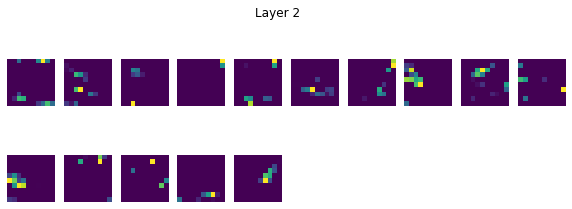

In [87]:
plt.figure(figsize=(10,5))
for i in range(visual2.shape[3]):
  plt.subplot(3,10, i+1)
  plt.imshow(visual2[0,:,:,i])
  plt.suptitle('Layer 2')
  plt.axis('off')